# Support Vector Machines for Steering Classification

This notebook trains and evaluates SVM classifiers:
- **Linear SVM**: Linear decision boundary
- **RBF Kernel SVM**: Non-linear decision boundary

**Key Concepts:**
- Finds maximum margin hyperplane separating classes
- Uses kernel trick for non-linear boundaries
- Support vectors determine the decision boundary


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

from utils import (
    load_data, preprocess_data, evaluate_model, 
    save_results, print_class_distribution, CLASSES, RANDOM_STATE
)

print("Libraries loaded successfully!")


Libraries loaded successfully!


## 1. Load and Preprocess Data

Note: SVM is sensitive to feature scaling, so we must standardize features.


In [2]:
# Load data
data = load_data()

X_raw, y_raw = data['raw']
X_eng, y_eng, feature_names = data['engineered']

# SVM requires scaling!
print("Preprocessing RAW data with PCA and scaling:")
raw_processed = preprocess_data(
    X_raw, y_raw, 
    test_size=0.2, 
    apply_pca_reduction=True, 
    pca_variance=0.95,
    scale=True  # Critical for SVM
)

print("\nPreprocessing ENGINEERED data with scaling:")
eng_processed = preprocess_data(
    X_eng, y_eng, 
    test_size=0.2, 
    apply_pca_reduction=False,
    scale=True
)

print("\nTraining set class distribution:")
print_class_distribution(raw_processed['y_train'], raw_processed['label_encoder'])


Loaded 9900 raw images
  Shape: (9900, 4096)
  Class distribution: {np.str_('forward'): np.int64(7343), np.str_('left'): np.int64(1620), np.str_('right'): np.int64(937)}
Loaded 9900 samples with 38 engineered features
  Class distribution: {'forward': np.int64(7343), 'left': np.int64(1620), 'right': np.int64(937)}
Preprocessing RAW data with PCA and scaling:
Train/Test split: 7920/1980 samples
PCA: 4096 features -> 65 components
  Variance retained: 95.01%

Preprocessing ENGINEERED data with scaling:
Train/Test split: 7920/1980 samples

Training set class distribution:
Class Distribution:
  forward: 5874 (74.2%)
  left: 1296 (16.4%)
  right: 750 (9.5%)


## 2. Linear SVM


Training Linear SVM on RAW (PCA) features...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best C: 0.01
Best CV F1 score: 0.8627

Model: SVM (Linear) | Features: raw
Accuracy:          0.9040
Balanced Accuracy: 0.9285
Macro F1:          0.8647
Weighted F1:       0.9075
Macro Precision:   0.8200
Macro Recall:      0.9285
ROC-AUC (macro):   0.9874

Per-class metrics:
  forward   : F1=0.9321, Precision=0.9812, Recall=0.8877
  left      : F1=0.8528, Precision=0.7692, Recall=0.9568
  right     : F1=0.8092, Precision=0.7097, Recall=0.9412

Classification Report:
              precision    recall  f1-score   support

     forward       0.98      0.89      0.93      1469
        left       0.77      0.96      0.85       324
       right       0.71      0.94      0.81       187

    accuracy                           0.90      1980
   macro avg       0.82      0.93      0.86      1980
weighted avg       0.92      0.90      0.91      1980



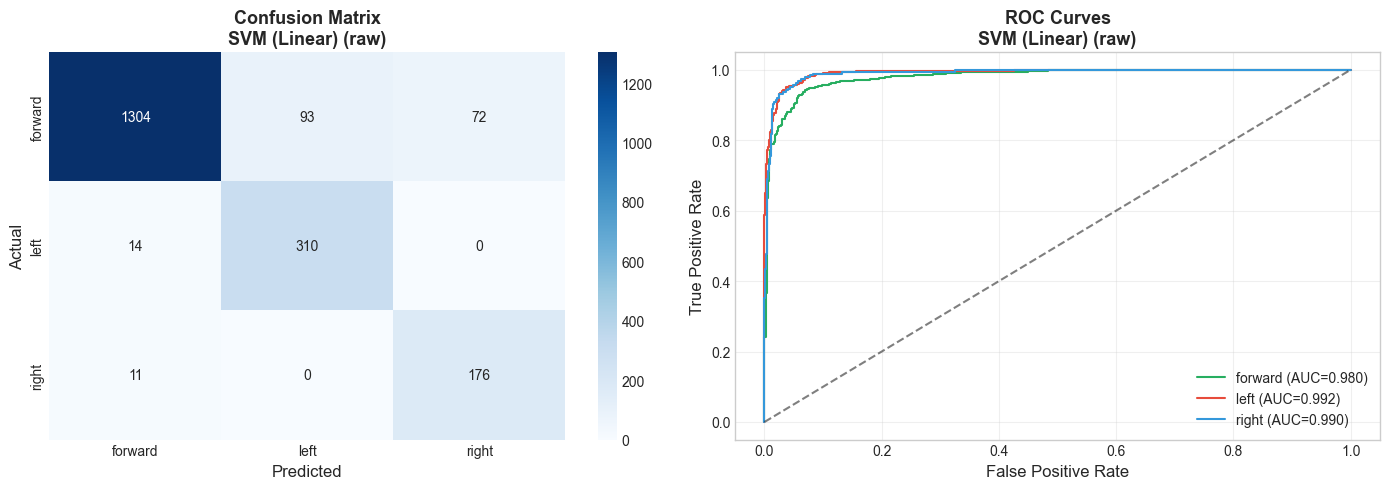

In [3]:
# Linear SVM on RAW features
print("Training Linear SVM on RAW (PCA) features...")

param_grid_linear = {
    'C': [0.01, 0.1, 1, 10]
}

svm_linear_raw = SVC(
    kernel='linear',
    class_weight='balanced',
    probability=True,
    random_state=RANDOM_STATE
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

grid_search_linear_raw = GridSearchCV(
    svm_linear_raw, param_grid_linear, cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1
)
grid_search_linear_raw.fit(raw_processed['X_train'], raw_processed['y_train'])

print(f"\nBest C: {grid_search_linear_raw.best_params_['C']}")
print(f"Best CV F1 score: {grid_search_linear_raw.best_score_:.4f}")

results_linear_raw = evaluate_model(
    grid_search_linear_raw.best_estimator_,
    raw_processed['X_test'],
    raw_processed['y_test'],
    model_name='SVM (Linear)',
    feature_type='raw',
    label_encoder=raw_processed['label_encoder']
)


Training Linear SVM on ENGINEERED features...
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best C: 10
Best CV F1 score: 0.7557

Model: SVM (Linear) | Features: engineered
Accuracy:          0.8086
Balanced Accuracy: 0.8664
Macro F1:          0.7554
Weighted F1:       0.8195
Macro Precision:   0.7038
Macro Recall:      0.8664
ROC-AUC (macro):   0.9482

Per-class metrics:
  forward   : F1=0.8574, Precision=0.9588, Recall=0.7754
  left      : F1=0.7268, Precision=0.6177, Recall=0.8827
  right     : F1=0.6822, Precision=0.5350, Recall=0.9412

Classification Report:
              precision    recall  f1-score   support

     forward       0.96      0.78      0.86      1469
        left       0.62      0.88      0.73       324
       right       0.53      0.94      0.68       187

    accuracy                           0.81      1980
   macro avg       0.70      0.87      0.76      1980
weighted avg       0.86      0.81      0.82      1980



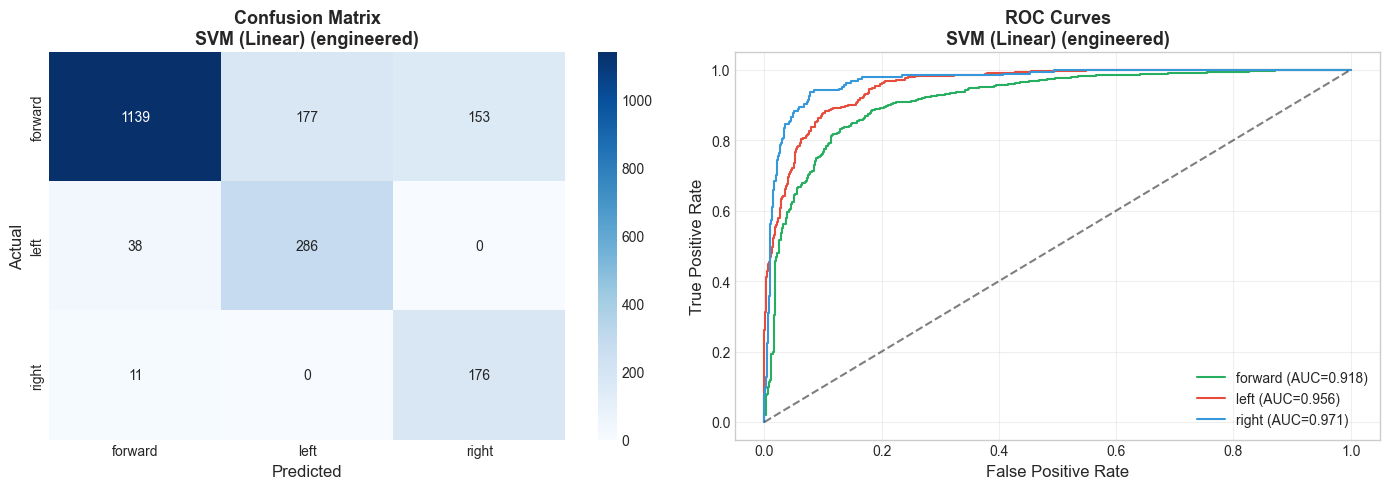

In [4]:
# Linear SVM on ENGINEERED features
print("Training Linear SVM on ENGINEERED features...")

grid_search_linear_eng = GridSearchCV(
    SVC(kernel='linear', class_weight='balanced', probability=True, random_state=RANDOM_STATE),
    param_grid_linear, cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1
)
grid_search_linear_eng.fit(eng_processed['X_train'], eng_processed['y_train'])

print(f"\nBest C: {grid_search_linear_eng.best_params_['C']}")
print(f"Best CV F1 score: {grid_search_linear_eng.best_score_:.4f}")

results_linear_eng = evaluate_model(
    grid_search_linear_eng.best_estimator_,
    eng_processed['X_test'],
    eng_processed['y_test'],
    model_name='SVM (Linear)',
    feature_type='engineered',
    label_encoder=eng_processed['label_encoder']
)


## 3. RBF Kernel SVM

Radial Basis Function kernel allows for non-linear decision boundaries.


Training RBF Kernel SVM on RAW (PCA) features...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'C': 10, 'gamma': 'scale'}
Best CV F1 score: 0.8875

Model: SVM (RBF) | Features: raw
Accuracy:          0.9172
Balanced Accuracy: 0.9235
Macro F1:          0.8803
Weighted F1:       0.9193
Macro Precision:   0.8463
Macro Recall:      0.9235
ROC-AUC (macro):   0.9876

Per-class metrics:
  forward   : F1=0.9423, Precision=0.9752, Recall=0.9115
  left      : F1=0.8644, Precision=0.7969, Recall=0.9444
  right     : F1=0.8341, Precision=0.7668, Recall=0.9144

Classification Report:
              precision    recall  f1-score   support

     forward       0.98      0.91      0.94      1469
        left       0.80      0.94      0.86       324
       right       0.77      0.91      0.83       187

    accuracy                           0.92      1980
   macro avg       0.85      0.92      0.88      1980
weighted avg       0.93      0.92      0.92      1980



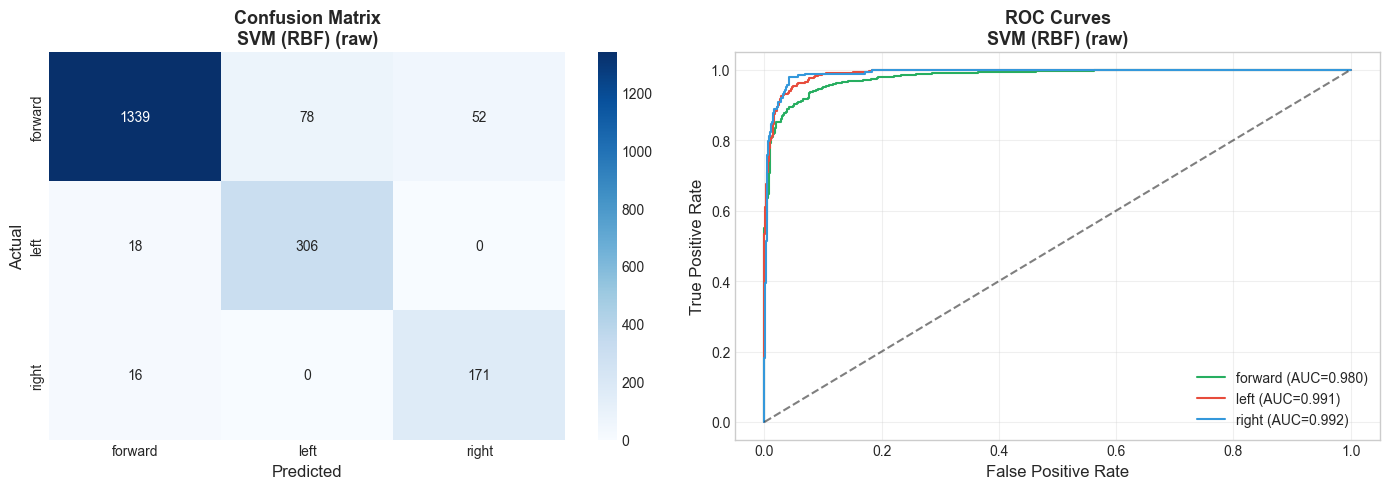

In [5]:
# RBF SVM on RAW features
print("Training RBF Kernel SVM on RAW (PCA) features...")

param_grid_rbf = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.1]
}

svm_rbf_raw = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=RANDOM_STATE
)

grid_search_rbf_raw = GridSearchCV(
    svm_rbf_raw, param_grid_rbf, cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1
)
grid_search_rbf_raw.fit(raw_processed['X_train'], raw_processed['y_train'])

print(f"\nBest parameters: {grid_search_rbf_raw.best_params_}")
print(f"Best CV F1 score: {grid_search_rbf_raw.best_score_:.4f}")

results_rbf_raw = evaluate_model(
    grid_search_rbf_raw.best_estimator_,
    raw_processed['X_test'],
    raw_processed['y_test'],
    model_name='SVM (RBF)',
    feature_type='raw',
    label_encoder=raw_processed['label_encoder']
)


Training RBF Kernel SVM on ENGINEERED features...
Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best parameters: {'C': 10, 'gamma': 'auto'}
Best CV F1 score: 0.8234

Model: SVM (RBF) | Features: engineered
Accuracy:          0.8717
Balanced Accuracy: 0.8871
Macro F1:          0.8236
Weighted F1:       0.8765
Macro Precision:   0.7804
Macro Recall:      0.8871
ROC-AUC (macro):   0.9678

Per-class metrics:
  forward   : F1=0.9090, Precision=0.9599, Recall=0.8632
  left      : F1=0.7890, Precision=0.7094, Recall=0.8889
  right     : F1=0.7727, Precision=0.6719, Recall=0.9091

Classification Report:
              precision    recall  f1-score   support

     forward       0.96      0.86      0.91      1469
        left       0.71      0.89      0.79       324
       right       0.67      0.91      0.77       187

    accuracy                           0.87      1980
   macro avg       0.78      0.89      0.82      1980
weighted avg       0.89      0.87      0.88      1980



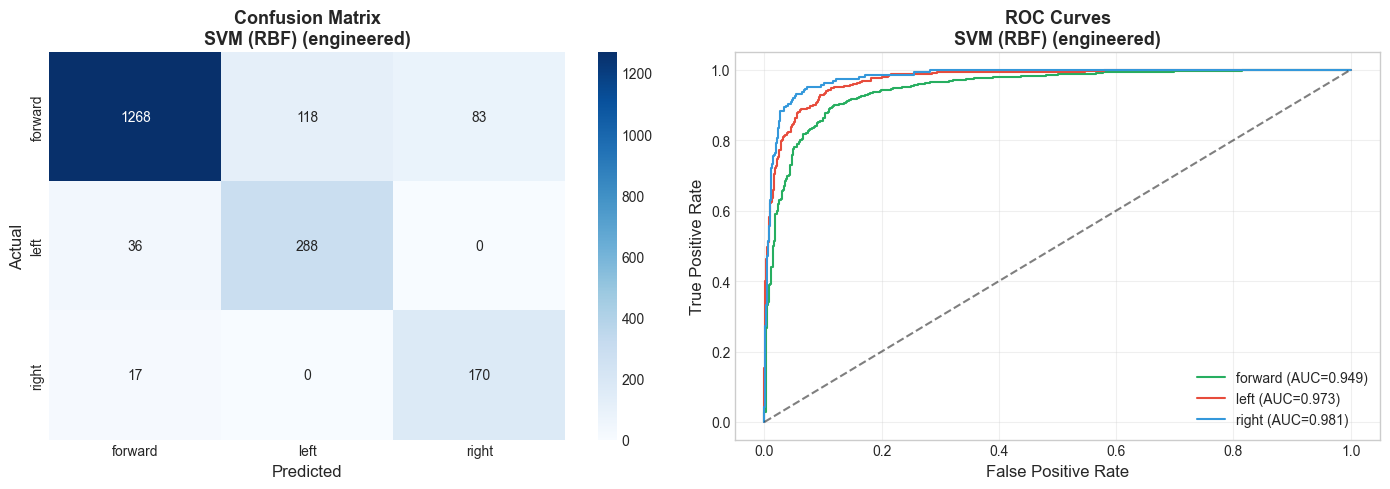

In [6]:
# RBF SVM on ENGINEERED features
print("Training RBF Kernel SVM on ENGINEERED features...")

grid_search_rbf_eng = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=RANDOM_STATE),
    param_grid_rbf, cv=skf, scoring='f1_macro', n_jobs=-1, verbose=1
)
grid_search_rbf_eng.fit(eng_processed['X_train'], eng_processed['y_train'])

print(f"\nBest parameters: {grid_search_rbf_eng.best_params_}")
print(f"Best CV F1 score: {grid_search_rbf_eng.best_score_:.4f}")

results_rbf_eng = evaluate_model(
    grid_search_rbf_eng.best_estimator_,
    eng_processed['X_test'],
    eng_processed['y_test'],
    model_name='SVM (RBF)',
    feature_type='engineered',
    label_encoder=eng_processed['label_encoder']
)


## 4. Results Summary


In [7]:
# Summary
all_results = [results_linear_raw, results_linear_eng, results_rbf_raw, results_rbf_eng]

summary_df = pd.DataFrame([
    {
        'Model': r['model_name'],
        'Features': r['feature_type'],
        'Accuracy': r['accuracy'],
        'Balanced Acc': r['balanced_accuracy'],
        'F1 (Macro)': r['f1_macro'],
        'ROC-AUC': r['roc_auc']
    }
    for r in all_results
])

print("\n" + "="*80)
print("SVM RESULTS SUMMARY")
print("="*80)
print(summary_df.to_string(index=False))



SVM RESULTS SUMMARY
       Model   Features  Accuracy  Balanced Acc  F1 (Macro)  ROC-AUC
SVM (Linear)        raw  0.904040      0.928548    0.864703 0.987379
SVM (Linear) engineered  0.808586      0.866417    0.755446 0.948223
   SVM (RBF)        raw  0.917172      0.923462    0.880282 0.987613
   SVM (RBF) engineered  0.871717      0.887051    0.823576 0.967777


In [8]:
# Save results
save_results(all_results, 'svm')
print("Results saved successfully!")


Results saved to ../../data/model_results/svm_results.json
Results saved successfully!


## 5. Key Observations

### Linear vs RBF Kernel
- **Linear**: Faster training, works well when data is linearly separable
- **RBF**: Handles non-linear boundaries, more flexible but risk of overfitting

### Important Parameters
- **C**: Regularization parameter (smaller = more regularization)
- **gamma** (RBF): Controls kernel width (larger = more local influence)

### Scaling Requirement
- SVM is very sensitive to feature scale
- Always standardize features before training

### Multi-class Strategy
- Uses one-vs-one (OvO) by default
- Fits k(k-1)/2 binary classifiers for k classes
